<a href="https://colab.research.google.com/github/rb7488/SIC_Project/blob/main/03_complexity_confidence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook analyzes model confidence to understand prediction certainty.
Confidence scores will later drive the adaptive inference gating mechanism.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BASE_PATH = "/content/drive/MyDrive/Adaptive_Inference_Project"

# 📥 Load Preprocessed Data

In [ ]:
import numpy as np
import os

X_test = np.load(f"{BASE_PATH}/processed_data/X_test.npy")
y_test = np.load(f"{BASE_PATH}/processed_data/y_test.npy")

print("Test data loaded:", X_test.shape)

Test data loaded: (2947, 561)


# 📦 Load Trained Models

In [ ]:
import joblib

lr_model = joblib.load(f"{BASE_PATH}/models/logistic_regression.pkl")
svm_model = joblib.load(f"{BASE_PATH}/models/svm.pkl")
rf_model = joblib.load(f"{BASE_PATH}/models/random_forest.pkl")

print("Models loaded successfully")

Models loaded successfully


# 🔢 Get Prediction Probabilities

Only models with predict_proba() are used for confidence.

In [ ]:
lr_probs = lr_model.predict_proba(X_test)
rf_probs = rf_model.predict_proba(X_test)

# 📊 Confidence Score (Max Probability)

Confidence = highest predicted class probability.

In [ ]:
lr_confidence = np.max(lr_probs, axis=1)
rf_confidence = np.max(rf_probs, axis=1)

# 📐 Entropy Calculation (Uncertainty Measure)

Lower entropy = higher confidence.

In [ ]:
def entropy(probabilities):
    return -np.sum(probabilities * np.log(probabilities + 1e-10), axis=1)

lr_entropy = entropy(lr_probs)
rf_entropy = entropy(rf_probs)

#  📈 Confidence Distribution

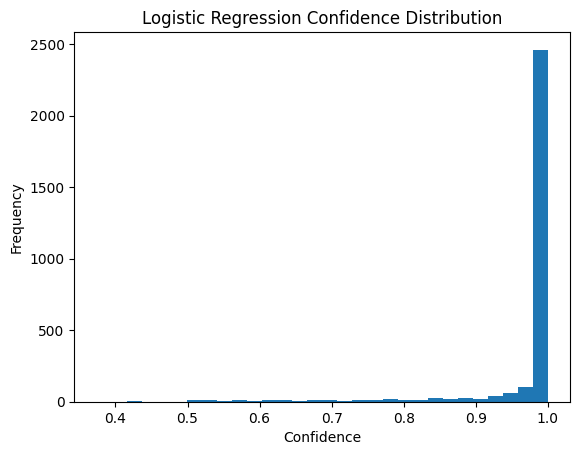

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(lr_confidence, bins=30)
plt.title("Logistic Regression Confidence Distribution")
plt.xlabel("Confidence")
plt.ylabel("Frequency")
plt.show()

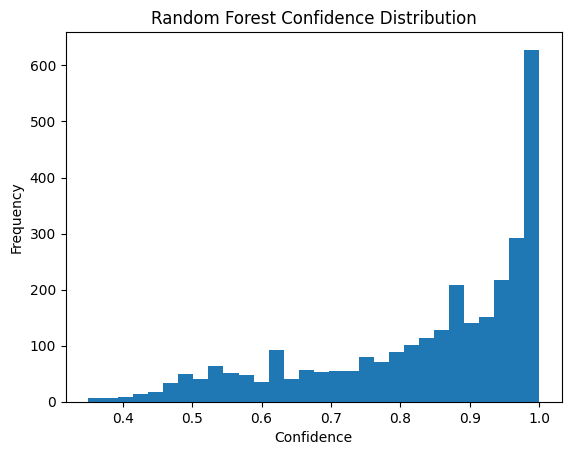

In [ ]:
plt.figure()
plt.hist(rf_confidence, bins=30)
plt.title("Random Forest Confidence Distribution")
plt.xlabel("Confidence")
plt.ylabel("Frequency")
plt.show()

## 📉 Entropy Distribution

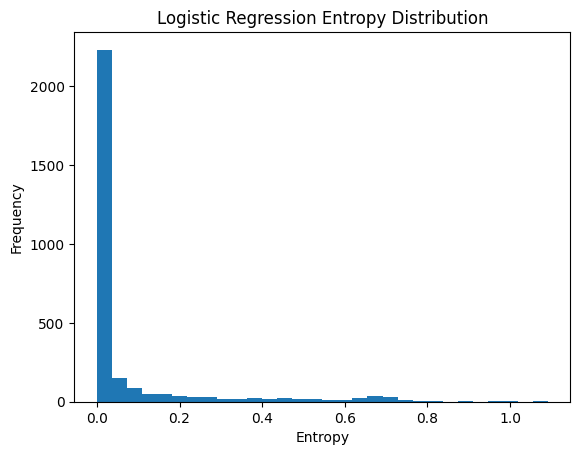

In [ ]:
plt.figure()
plt.hist(lr_entropy, bins=30)
plt.title("Logistic Regression Entropy Distribution")
plt.xlabel("Entropy")
plt.ylabel("Frequency")
plt.show()

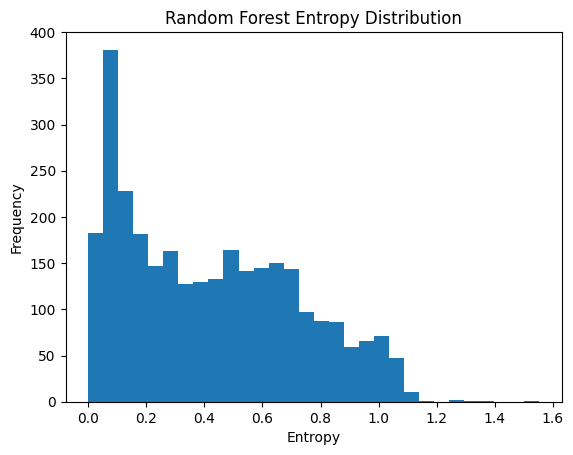

In [ ]:
plt.figure()
plt.hist(rf_entropy, bins=30)
plt.title("Random Forest Entropy Distribution")
plt.xlabel("Entropy")
plt.ylabel("Frequency")
plt.show()

# 🎯 Easy vs Hard Sample Identification

Threshold-based classification:

In [ ]:
CONFIDENCE_THRESHOLD = 0.8

lr_easy = lr_confidence >= CONFIDENCE_THRESHOLD
rf_easy = rf_confidence >= CONFIDENCE_THRESHOLD

print("LR Easy samples:", np.sum(lr_easy))
print("LR Hard samples:", np.sum(~lr_easy))

print("RF Easy samples:", np.sum(rf_easy))
print("RF Hard samples:", np.sum(~rf_easy))

LR Easy samples: 2781
LR Hard samples: 166
RF Easy samples: 2031
RF Hard samples: 916


# 📊 Accuracy on Easy vs Hard Samples

In [ ]:
from sklearn.metrics import accuracy_score

lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

print("LR Easy Accuracy:",
      accuracy_score(y_test[lr_easy], lr_preds[lr_easy]))

print("LR Hard Accuracy:",
      accuracy_score(y_test[~lr_easy], lr_preds[~lr_easy]))

LR Easy Accuracy: 0.9755483638978785
LR Hard Accuracy: 0.6144578313253012


In [ ]:
print("RF Easy Accuracy:",
      accuracy_score(y_test[rf_easy], rf_preds[rf_easy]))

print("RF Hard Accuracy:",
      accuracy_score(y_test[~rf_easy], rf_preds[~rf_easy]))

RF Easy Accuracy: 0.9916297390448056
RF Hard Accuracy: 0.7805676855895196


# 💾 Save Confidence Outputs (for Notebook-4)

In [ ]:
os.makedirs(f"{BASE_PATH}/confidence_outputs", exist_ok=True)

np.save(f"{BASE_PATH}/confidence_outputs/lr_confidence.npy", lr_confidence)
np.save(f"{BASE_PATH}/confidence_outputs/rf_confidence.npy", rf_confidence)
np.save(f"{BASE_PATH}/confidence_outputs/lr_entropy.npy", lr_entropy)
np.save(f"{BASE_PATH}/confidence_outputs/rf_entropy.npy", rf_entropy)

print("Confidence outputs saved")

Confidence outputs saved
